# NewsMood #
Twitter has become a wildly sprawling jungle of information—140 characters at a time. Somewhere between 350 million and 500 million tweets are estimated to be sent out per day. With such an explosion of data, on Twitter and elsewhere, it becomes more important than ever to tame it in some way, to concisely capture the essence of the data.

In this assignment, you'll create a Python script to perform a sentiment analysis of the Twitter activity of various news oulets, and to present your findings visually.

Your final output should provide a visualized summary of the sentiments expressed in Tweets sent out by the following news organizations: BBC, CBS, CNN, Fox, and New York times.

### Analysis ###
For March 8, 2018, BBC has the most negative sentiment overall whereas CBS has the most positive. These are based on the average Compound score for each news outlet.

Four out of the five news outlets had overall negative sentiments, so for March 8, the overall sentiment of the news was negative.

In [168]:
# tweepy, pandas, matplotlib, seaborn, textblob, and VADER.
import tweepy
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [169]:
# initializing sentiment analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [170]:
# twitter api keys
import config

consumer_key = config.key
consumer_secret = config.secret_key
access_token = config.token
access_token_secret = config.secret_token

In [171]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

### Tweet Information ###

In [178]:
# list of news stations
target_terms = ["@BBCNews", "@CBSNews", "@CNN", "@FoxNews", "@nytimes"]

# holding the items in our list
tweet_info = []

# loop through each news station to get the recent 100 tweets (500 tweets total)
for x in range(5):
    
    # loop through all news stations
    for target in target_terms:
        public_tweets = api.user_timeline(target, page=x)
        
        # loop through all tweets
        for tweet in public_tweets:
            
            # run vader analysis on each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            
            # add sentiments for each tweet into an array
            tweet_info.append({"Date": tweet["created_at"],
                               "Media Source": tweet['user']['screen_name'],
                               "Compound": compound,
                               "Positive": pos,
                               "Negative": neu,
                               "Neutral": neg,
                              "Text": tweet["text"]})

# create dataframe containing sentiment
tweet_info_df = pd.DataFrame(tweet_info) 

tweet_info_df["Tweets Ago"] = tweet_info_df["Date"].index

# cleanup dataframe
tweet_info_df = tweet_info_df[["Media Source","Date","Tweets Ago","Text", "Compound", "Negative", "Neutral", "Positive"]]

tweet_info_df


,Media Source,Date,Tweets Ago,Text,Compound,Negative,Neutral,Positive
0,BBCNews,Thu Mar 08 22:37:52 +0000 2018,0,"Friday's Daily Mirror: ""M25 rapist is dead"" \n...",-0.8807,0.495,0.505,0.000
1,BBCNews,Thu Mar 08 22:36:35 +0000 2018,1,"Friday's The Times: ""Traitors are not safe on ...",-0.3412,0.862,0.138,0.000
2,BBCNews,Thu Mar 08 22:36:18 +0000 2018,2,"Friday's The Guardian: ""Ministers set to offer...",0.0000,1.000,0.000,0.000
3,BBCNews,Thu Mar 08 22:36:03 +0000 2018,3,"Friday's The Sun: ""Our lad's beating Vlad""\n#t...",-0.4588,0.769,0.231,0.000
4,BBCNews,Thu Mar 08 22:35:40 +0000 2018,4,"Friday's Daily Telegraph: ""Give blood pressure...",-0.2960,0.864,0.136,0.000
5,BBCNews,Thu Mar 08 20:31:12 +0000 2018,5,"IoD chair accused of racist, sexist, and bully...",-0.8779,0.409,0.591,0.000
6,BBCNews,Thu Mar 08 20:28:10 +0000 2018,6,RT @BBCSport: Back to winning ways!\n\nArsenal...,0.2481,0.748,0.106,0.145
7,BBCNews,Thu Mar 08 20:12:33 +0000 2018,7,Knuckle-duster attack woman 'let down by syste...,-0.4767,0.693,0.307,0.000
8,BBCNews,Thu Mar 08 19:53:19 +0000 2018,8,RT @BBC_HaveYourSay: The NHS is 70 years old t...,0.3612,0.868,0.000,0.132
9,BBCNews,Thu Mar 08 19:07:31 +0000 2018,9,UK government to press on with Brexit bill des...,-0.1877,0.689,0.181,0.130


In [179]:
# Export the data in the DataFrame into a CSV file.
tweet_info_df.to_csv("NewsMood.csv", encoding='utf-8', index=False)

### Polarity of Individual Tweets ###

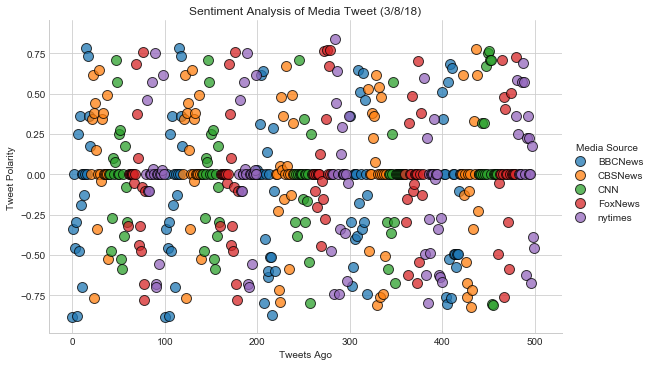

In [180]:

# create scatterplot
scatter = sns.FacetGrid(data=tweet_info_df, hue='Media Source', aspect=1.61, size=5)
scatter.map(plt.scatter, 'Tweets Ago', 'Compound', edgecolors="black", alpha=0.75, s=100).add_legend()

# add title and lable axis
plt.title("Sentiment Analysis of Media Tweet (3/8/18)")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")

# save .png image for plot
plt.savefig("SentimentAnalysis.png")
plt.show()

### Average Compound Scores of News Outlets ###

/Users/abigailvasquez/anaconda3/envs/PythonData/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


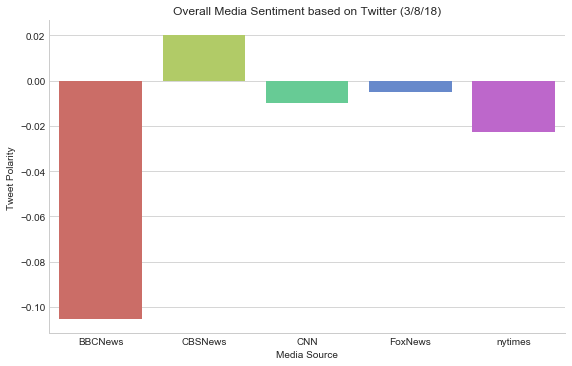

In [181]:
# group dataframe by Media Source
media_source = tweet_info_df.groupby("Media Source")
#calculate average compound score
avg_cmp = media_source.mean()

tweet_avg = avg_cmp.reset_index(drop=False)
tweet_avg

# set type and palette for colors
_type = ['BBCNews', 'CBSNews', 'CNN', 'FoxNews', 'nytimes']
col_pal = sns.color_palette("hls", 5)

# create barplot
barbar = sns.factorplot(data=tweet_avg, x='Media Source', y='Compound', kind='bar', size=5, aspect=1.61, 
                        hue_order=_type, palette=col_pal)
sns.set_style("whitegrid")

# add title and label axis
plt.title("Overall Media Sentiment based on Twitter (3/8/18)")
plt.ylabel("Tweet Polarity")

# save .png image for plot
plt.savefig("SentimentAverage.png")
plt.show()